<a href="https://colab.research.google.com/github/Sharvin03/LAB_7_SE/blob/main/Flight_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('/content/Clean_Dataset.csv')

In [ ]:
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
data.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [ ]:
data.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [ ]:
data.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [ ]:
data.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [ ]:
data.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [ ]:
data['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [ ]:
data['duration'].min()

0.83

In [ ]:
data['duration'].max()

49.83

In [ ]:
data['duration'].median()

11.25

Feature Engineering
1. Drop Unnamed
2. One hot encode airline
3. Drop flight
4. One hot encode source_city and departure_time,
5. arrival_time, destination_city
6. turn stops into numerical feature
7. turn class into binary feature
8. leave days_left and price the same










Data Preprocessing

In [ ]:
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('flight', axis=1)

data['class'] = data['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [ ]:
pd.factorize(data.stops)

(array([0, 0, 0, ..., 1, 1, 1]),
 Index(['zero', 'one', 'two_or_more'], dtype='object'))

In [ ]:
data.stops = pd.factorize(data.stops)[0]

In [ ]:
data = data.join(pd.get_dummies(data.airline, prefix='airline')).drop('airline', axis=1)
data = data.join(pd.get_dummies(data.source_city, prefix='source')).drop('source_city', axis=1)
data = data.join(pd.get_dummies(data.destination_city, prefix='dest')).drop('destination_city', axis=1)
data = data.join(pd.get_dummies(data.arrival_time, prefix='arrival')).drop('arrival_time', axis=1)
data = data.join(pd.get_dummies(data.departure_time, prefix='departure')).drop('departure_time', axis=1)

In [ ]:
data

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


Training Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X, y = data.drop('price', axis=1), data.price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
reg = RandomForestRegressor(n_jobs = -1)
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [ ]:
reg.score(X_test,y_test)

0.9854415108547033

In [ ]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  0.9854415108547033
MAE:  1074.7317501195812
MSE:  7500659.052489172
RMSE:  2738.733110854209


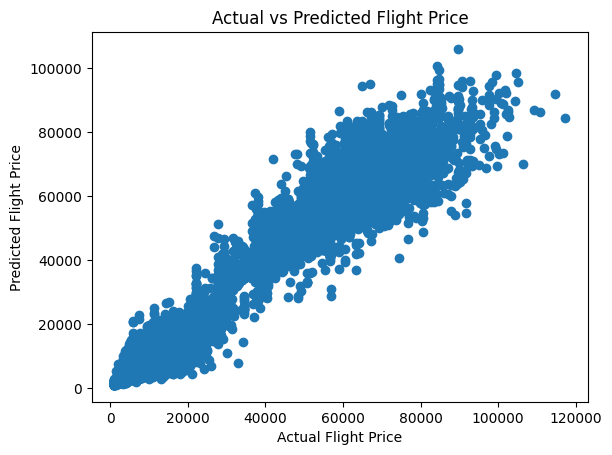

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Actual vs Predicted Flight Price')
plt.show()

In [ ]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
sorted_importances

[('class', 0.8797807485524949),
 ('duration', 0.057693355496340484),
 ('days_left', 0.018653624001417596),
 ('airline_Vistara', 0.005399685235412185),
 ('airline_Air_India', 0.004591916531336968),
 ('source_Delhi', 0.003620718097840723),
 ('dest_Delhi', 0.003236339065108054),
 ('source_Mumbai', 0.002205826053592165),
 ('stops', 0.0018846222259827337),
 ('dest_Kolkata', 0.0018719859489048335),
 ('dest_Mumbai', 0.001809501828368275),
 ('source_Kolkata', 0.0017880418402263288),
 ('arrival_Evening', 0.0016827298066909569),
 ('dest_Hyderabad', 0.0014875470511138736),
 ('dest_Bangalore', 0.0012892163606334306),
 ('source_Hyderabad', 0.001264443636931544),
 ('arrival_Night', 0.001125038641956844),
 ('source_Bangalore', 0.0010771811367759365),
 ('departure_Evening', 0.0010723080362758733),
 ('arrival_Afternoon', 0.0010039187117667696),
 ('dest_Chennai', 0.0009208822479136889),
 ('source_Chennai', 0.0009207978294927633),
 ('departure_Morning', 0.0008747770086272583),
 ('departure_Afternoon', 0.

In [ ]:
from sklearn.model_selection import GridSearchCV
reg = RandomForestRegressor(n_jobs=-1)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto','sqrt']
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100,300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2,11),
    'min_samples_leaf': randint(1,5),
    'max_features': [1.0,'auto','sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)
random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist,n_iter=2, cv=3,scoring='neg_mean_squared_error',verbose=2,random_state=10,n_jobs=-1)
random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [ ]:
best_regressor.score(X_test,y_test)

0.986373915599211

In [ ]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)

print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  0.986373915599211
MAE:  1091.7883668657905
MSE:  7020276.093950231
RMSE:  2649.5803618592568


In [ ]:
input